In [2]:
# Install R and necessary packages
!apt-get install -y r-base
!apt-get install -y r-cran-ggplot2


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.1-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-cran-ggplot2 is already the newest version (3.5.1-1.ca2204.1).
r-cran-ggplot2 set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [3]:
# Install the R magic extension
%load_ext rpy2.ipython

In [1]:
from google.colab import files
uploaded = files.upload()

Saving 42_Cases_under_crime_against_women.csv to 42_Cases_under_crime_against_women.csv


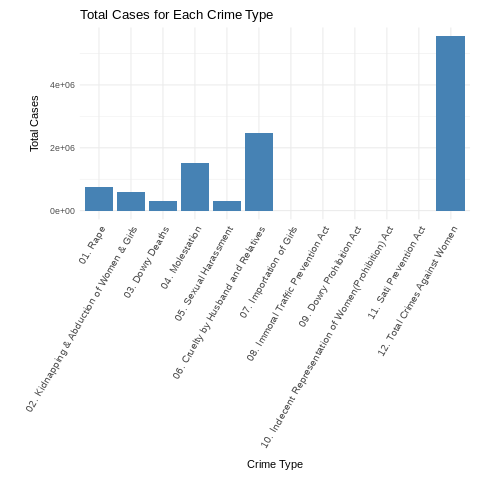

In [22]:
%%R
# Create bar chart with adjusted margins and space for labels
ggplot(crime_summary_bar, aes(x=Sub_Group_Name, y=Total_Cases_for_Trial)) +
  geom_bar(stat="identity", fill="steelblue") +
  theme_minimal() +
  labs(title="Total Cases for Each Crime Type", x="Crime Type", y="Total Cases") +
  theme(
    axis.text.x = element_text(angle = 60, hjust = 1, vjust = 1, size = 10),
    axis.title.x = element_text(margin = margin(t = 10)),
    axis.title.y = element_text(margin = margin(r = 10)),
    plot.margin = margin(10, 10, 10, 30)
  )


Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




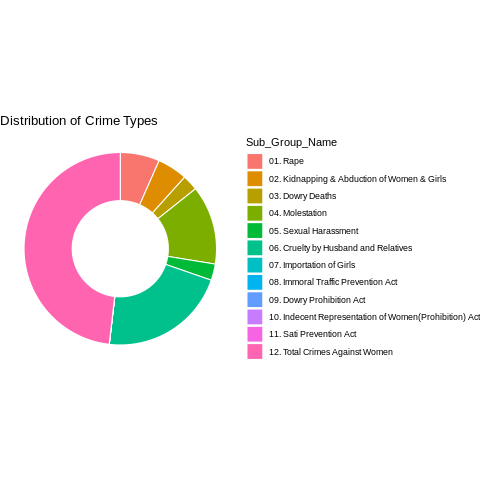

In [5]:
%%R
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Aggregate data
crime_summary_pie <- aggregate(Total_Cases_for_Trial ~ Sub_Group_Name, data=crime_data, sum)

# Add a column for label positioning
crime_summary_pie <- crime_summary_pie %>%
  mutate(fraction = Total_Cases_for_Trial / sum(Total_Cases_for_Trial),
         ymin = cumsum(fraction) - fraction,
         ymax = cumsum(fraction))

# Create pie chart with ggplot2 and visible borders
ggplot(crime_summary_pie, aes(ymax = ymax, ymin = ymin, xmax = 4, xmin = 3, fill = Sub_Group_Name)) +
  geom_rect(color = "white") +  # Add white border between slices
  coord_polar(theta = "y") +
  xlim(c(2, 4)) +
  theme_void() +
  labs(title = "Distribution of Crime Types") +
  theme(legend.position = "right")

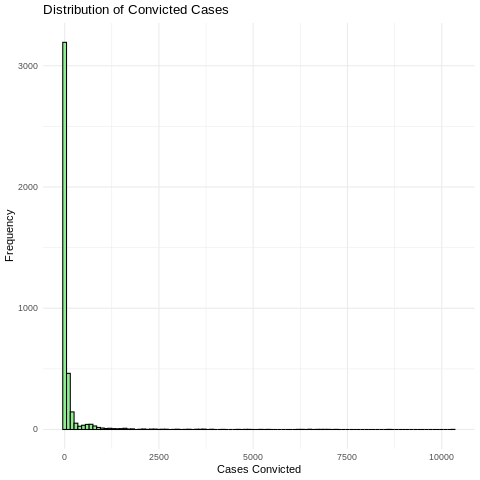

In [6]:
%%R
# Create histogram of Cases_Convicted
ggplot(crime_data, aes(x=Cases_Convicted)) +
  geom_histogram(binwidth=100, fill="lightgreen", color="black") +
  labs(title="Distribution of Convicted Cases", x="Cases Convicted", y="Frequency") +
  theme_minimal()



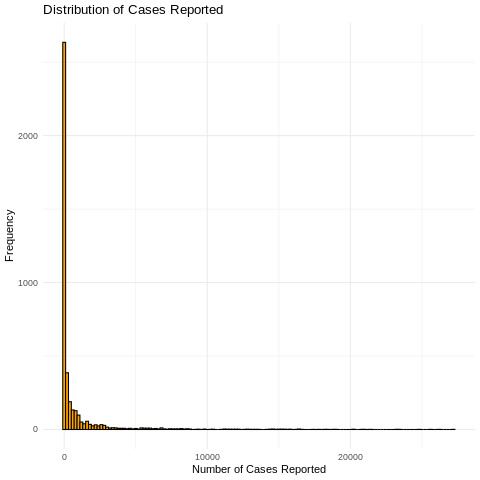

In [7]:
%%R
ggplot(crime_data, aes(x = Cases_Reported)) +
  geom_histogram(binwidth = 200, fill = "orange", color = "black", na.rm = TRUE) +
  labs(title = "Distribution of Cases Reported",
       x = "Number of Cases Reported",
       y = "Frequency") +
  theme_minimal()


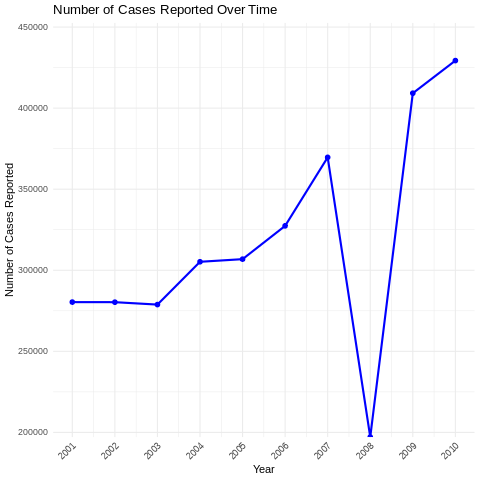

In [25]:
%%R
# Convert 'Year' to numeric if it is not already
crime_data$Year <- as.numeric(as.character(crime_data$Year))

# Check for any conversion issues
sum(is.na(crime_data$Year))

# Remove rows with missing 'Year'
crime_data <- na.omit(crime_data)

# Aggregate the number of cases reported by year
crime_summary <- aggregate(Cases_Reported ~ Year, data = crime_data, sum)

# Create the timeline chart with integer x-axis values
ggplot(crime_summary, aes(x = Year, y = Cases_Reported)) +
  geom_line(color = "blue", size = 1) +
  geom_point(color = "blue", size = 2) +
  labs(title = "Number of Cases Reported Over Time", x = "Year", y = "Number of Cases Reported") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_x_continuous(breaks = seq(min(crime_summary$Year), max(crime_summary$Year), by = 1)) +
  scale_y_continuous(expand = expansion(mult = c(0, 0.1)))


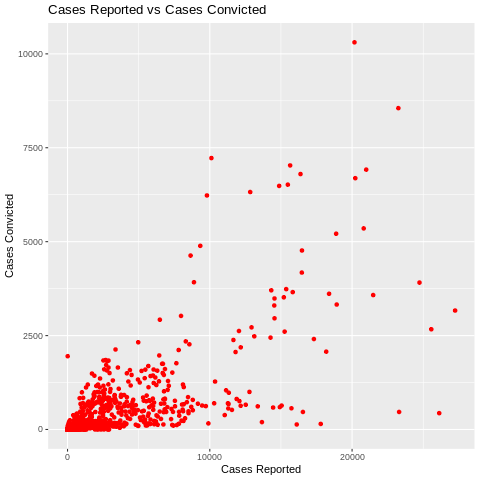

In [9]:
%%R
# Create scatter plot
ggplot(crime_data, aes(x=Cases_Reported, y=Cases_Convicted)) +
  geom_point(color="red") +
  labs(title="Cases Reported vs Cases Convicted", x="Cases Reported", y="Cases Convicted")


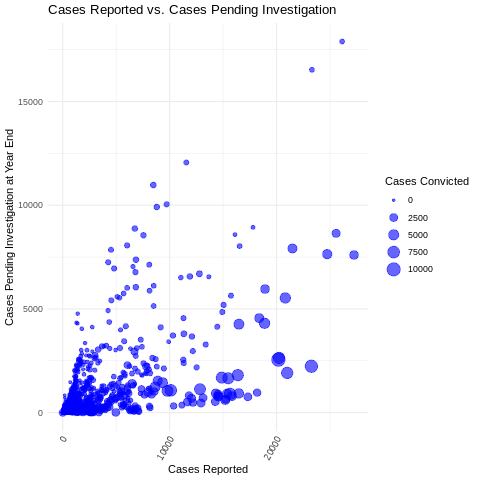

In [ ]:
%%R
ggplot(crime_data, aes(x = Cases_Reported, y = Cases_Pending_Investigation_at_Year_End, size = Cases_Convicted)) +
  geom_point(alpha = 0.6, color = "blue") +
  labs(title = "Cases Reported vs. Cases Pending Investigation",
       x = "Cases Reported",
       y = "Cases Pending Investigation at Year End",
       size = "Cases Convicted") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 60, hjust = 1))

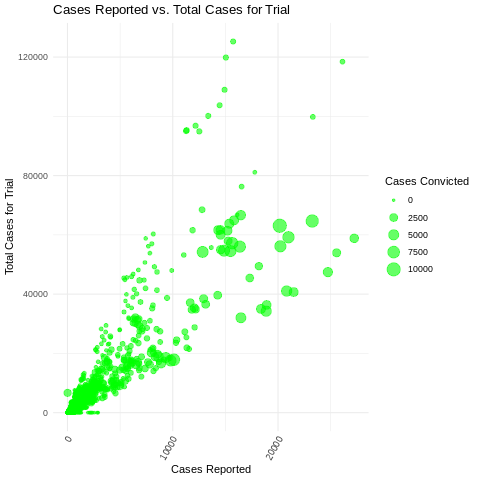

In [ ]:
%%R
ggplot(crime_data, aes(x = Cases_Reported, y = Total_Cases_for_Trial, size = Cases_Convicted)) +
  geom_point(alpha = 0.6, color = "green") +
  labs(title = "Cases Reported vs. Total Cases for Trial",
       x = "Cases Reported",
       y = "Total Cases for Trial",
       size = "Cases Convicted") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 60, hjust = 1))


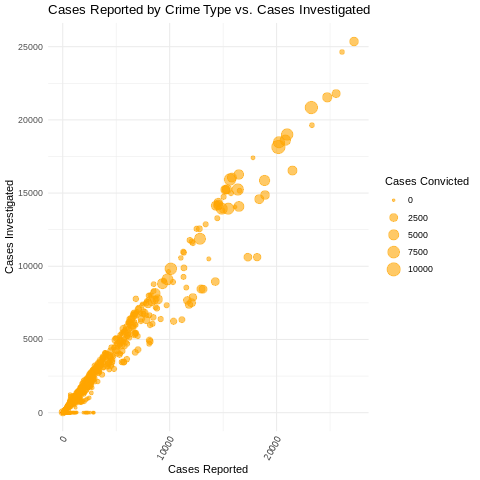

In [26]:
%%R
ggplot(crime_data, aes(x = Cases_Reported, y = Cases_Investigated_Chargesheets.FR_Submitted, size = Cases_Convicted)) +
  geom_point(alpha = 0.6, color = "orange") +
  labs(title = "Cases Reported by Crime Type vs. Cases Investigated",
       x = "Cases Reported",
       y = "Cases Investigated",
       size = "Cases Convicted") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 60, hjust = 1))
